In [54]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Refresher, the IncomeStatsDf is the combination of all total and salary tables that had overlap with player name and season.

In [55]:
df=pd.read_csv("Data/IncomeStatsDf.csv")
print df.shape
df.head()

(9665, 32)


,Player,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,FG,FG%,FGA,FT,FT%,FTA,G,GS,Lg,MP,ORB,PF,PTS,Pos,STL,Season,TOV,TRB,Tm,eFG%,Salary
0,Alaa Abdelnaby,55,0.474,116,0,NaN,0,12,22,12,62,55,0.474,116,25,0.568,44,43,0,NBA,290,27,39,135,PF,4,1990-91,22,89,POR,0.474,724588.0
1,Alaa Abdelnaby,178,0.493,361,0,NaN,0,30,23,16,179,178,0.493,361,76,0.752,101,71,1,NBA,934,81,132,432,PF,25,1991-92,66,260,POR,0.493,857732.2
2,Alaa Abdelnaby,245,0.519,472,0,0,1,27,24,26,211,245,0.518,473,88,0.759,116,75,52,NBA,1311,126,189,578,PF,25,1992-93,97,337,TOT,0.518,846150.0
3,Alaa Abdelnaby,24,0.436,55,0,NaN,0,3,25,3,34,24,0.436,55,16,0.640,25,13,0,NBA,159,12,20,64,PF,2,1993-94,17,46,BOS,0.436,1319314.5
4,Alaa Abdelnaby,118,0.515,229,0,0,2,13,26,12,77,118,0.511,231,20,0.571,35,54,0,NBA,506,37,104,256,PF,15,1994-95,45,114,TOT,0.511,1039025.0


In [56]:
#all the independent factors that are continuous floats 
FLOATS = [u'2P', u'2P%', u'2PA', u'3P', u'3P%', u'3PA', u'AST', u'Age', u'BLK', u'DRB', u'FG', u'FG%', u'FGA', u'FT', u'FT%', u'FTA', u'G', u'GS', u'MP', u'ORB', u'PF', u'PTS', u'STL', u'TOV', u'TRB', u'eFG%']
#all the independent factors that are categorical variables
CATS = [u'Season', u'Pos', u'Tm']

In [57]:
nans=['2P%','3P%','FG%','FT%','eFG%']
for x in nans:
    df[x].fillna(0, inplace=True)

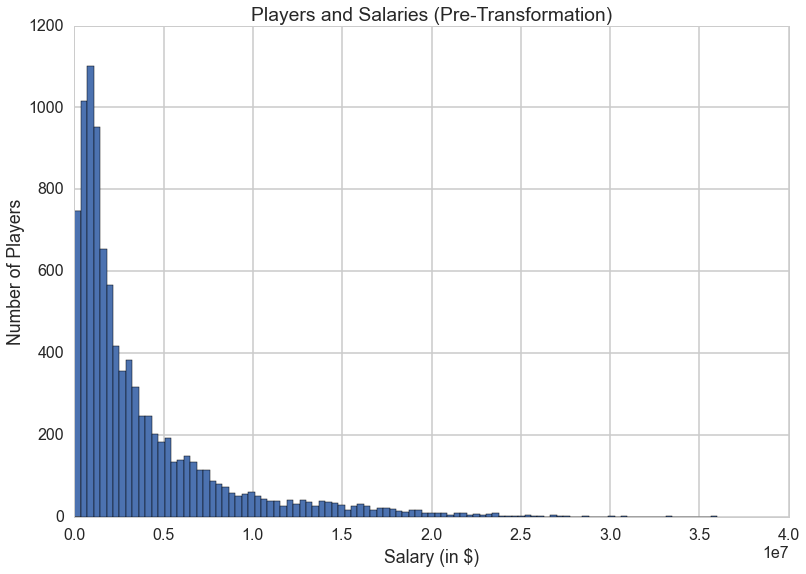

In [58]:
#plots players' salaries
plt.hist(df['Salary'].values,bins = 100)
plt.ylabel('Number of Players')
plt.xlabel('Salary (in $)')
plt.title('Players and Salaries (Pre-Transformation)');

In [59]:
#logs players' salaries for better visual
df['Salary']=df['Salary'].apply(lambda x: np.log(x))

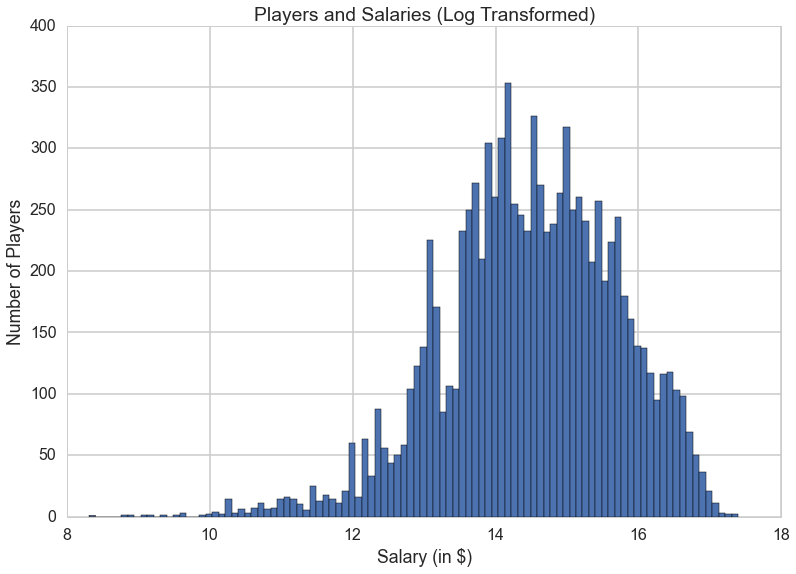

In [60]:
#plots players' salaries (logged)
plt.hist(df['Salary'].values, bins = 100)
plt.ylabel('Number of Players')
plt.xlabel('Salary (in $)')
plt.title('Players and Salaries (Log Transformed)');

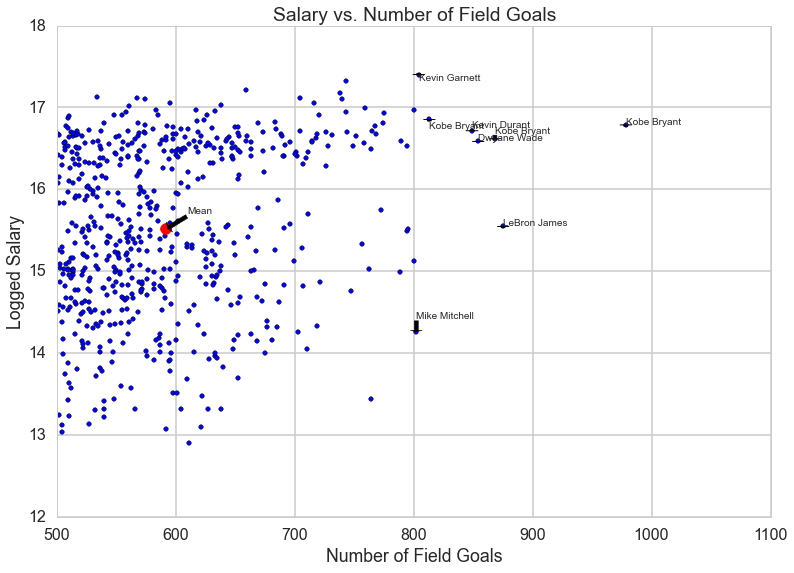

In [61]:
#plots players with field goals over 500 against salary (logged)
param = 500.
fg=[]
salary = []
player = []
for a in df.index:
    if df['FG'][a] > param:
        fg.append(df['FG'][a])
        salary.append(df['Salary'][a])
        player.append(df['Player'][a])
for x,y,z in zip(fg, salary, player):
    if x>800:
        plt.annotate(z, xy=(x,y), xytext=(x, y+.1*np.random.randn()), arrowprops=dict(facecolor='black', shrink=0.05))

plt.scatter(fg, salary)
plt.plot(np.mean(fg),np.mean(salary), 'ro')
plt.annotate("Mean", xy=(np.mean(fg), np.mean(salary)), xytext=(610, 15.7), arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(12)
plt.xlim(param)
plt.ylabel('Logged Salary')
plt.xlabel('Number of Field Goals')
plt.title('Salary vs. Number of Field Goals');

Now we do similar plots for all of our numerical data.

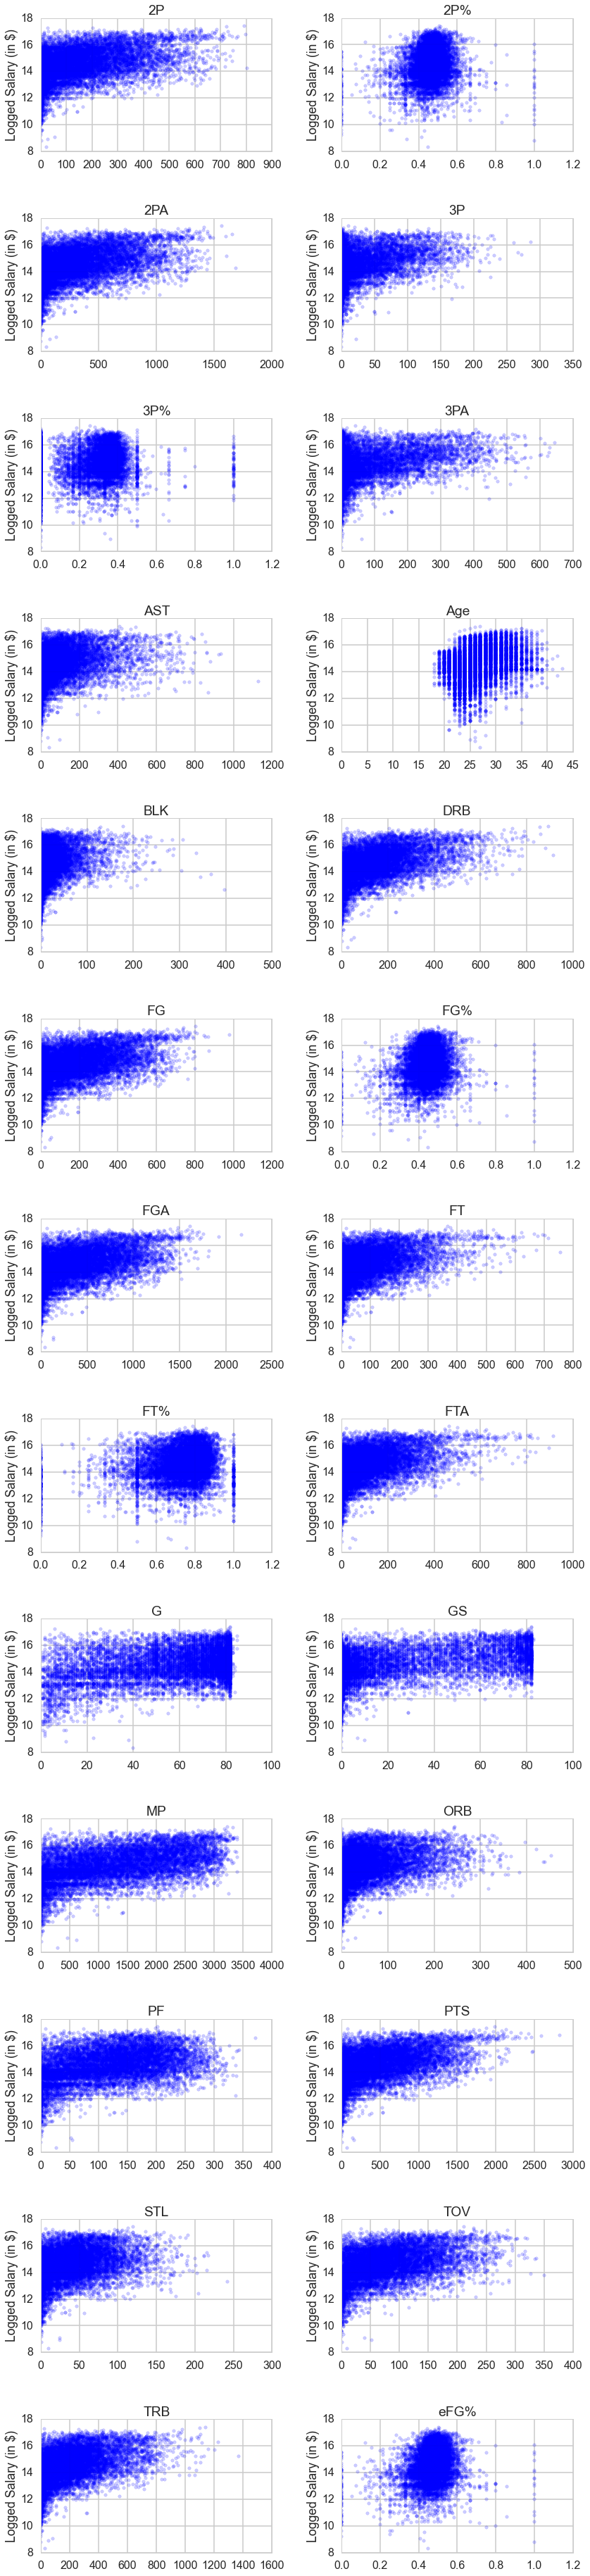

In [62]:
#initiaties i to help with subplots
i=1
#specifies size and layout of subplots
plt.subplots(nrows=13, ncols=2, figsize=(12,50))
plt.subplots_adjust(left=None, bottom=0, right=1, top=1, wspace=0.3, hspace=0.5)
#iterates through all features in ccols
for x in FLOATS:
    plt.subplot(13,2,i)
    i=i+1
    plt.scatter(df[x],df['Salary'], alpha = .2, color="b", label=x)
    plt.ylim(8)
    plt.xlim(0)
    plt.ylabel('Logged Salary (in $)')
    plt.title(x)

Next we plot the distribution of logged salaries for each team.  As you can see teams, such as PHI, have a wide distribution and VAN have a more narrow distribution.  Additionally, it does seem like each team's distribution of incomes is relatively normally distributed, with varying degrees of left-skew.   

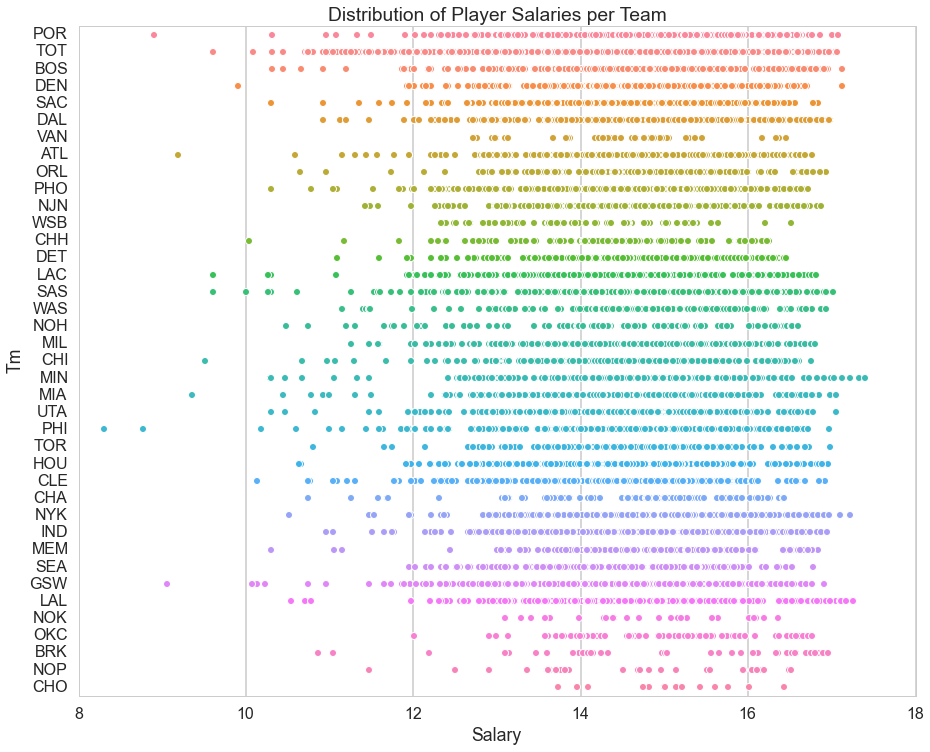

In [63]:
plt.figure(figsize=(15,12))
sns.stripplot(y=df['Tm'], x=df['Salary']);
plt.title('Distribution of Player Salaries per Team')
plt.xlim(8);

Next we looked at max player salaries and how they were distributed.  It was also normally distributed.  We chose not to do any more analysis on these figures because they didn't seem super relevant to predicting salary contracts.

In [64]:
dfmax = df
dfmax = dfmax.groupby('Player')
dfmax = dfmax.apply(lambda x: x[x['Salary'] == x['Salary'].max()]).reset_index(drop=True)

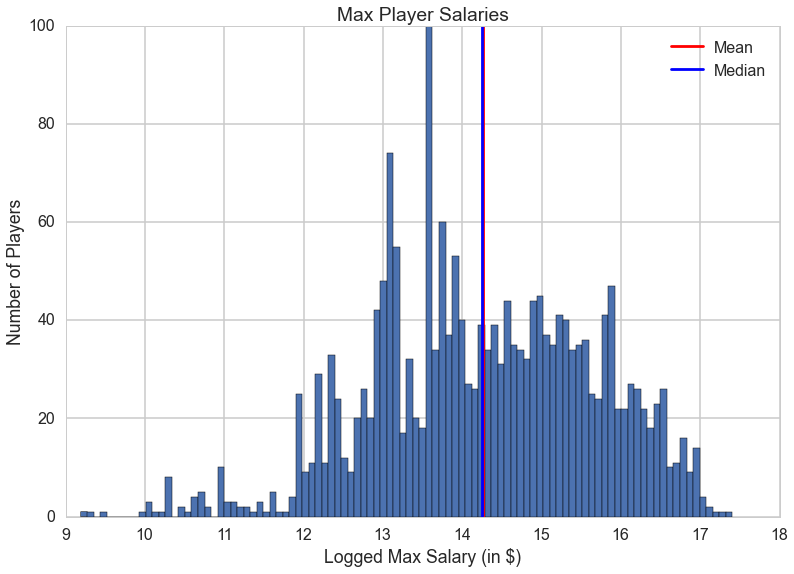

In [65]:
plt.hist(dfmax['Salary'].values, bins=100)
plt.xlabel('Logged Max Salary (in $)')
plt.ylabel('Number of Players')
plt.title('Max Player Salaries')
plt.axvline(dfmax['Salary'].mean(), color='r', label="Mean")
plt.axvline(dfmax['Salary'].median(), label="Median")
plt.legend();

We also looked at salary against our categorical variables. The following charts look at the historical minimum salaries against each variable. According to season data, in more recent years the NBA has been lowering their salary offers, as compared to the 80s. It would appear that, as a player seeking a high salary, positions like PG-SF and teams like CHO, NOK, and VAN are very generous in salaries. 

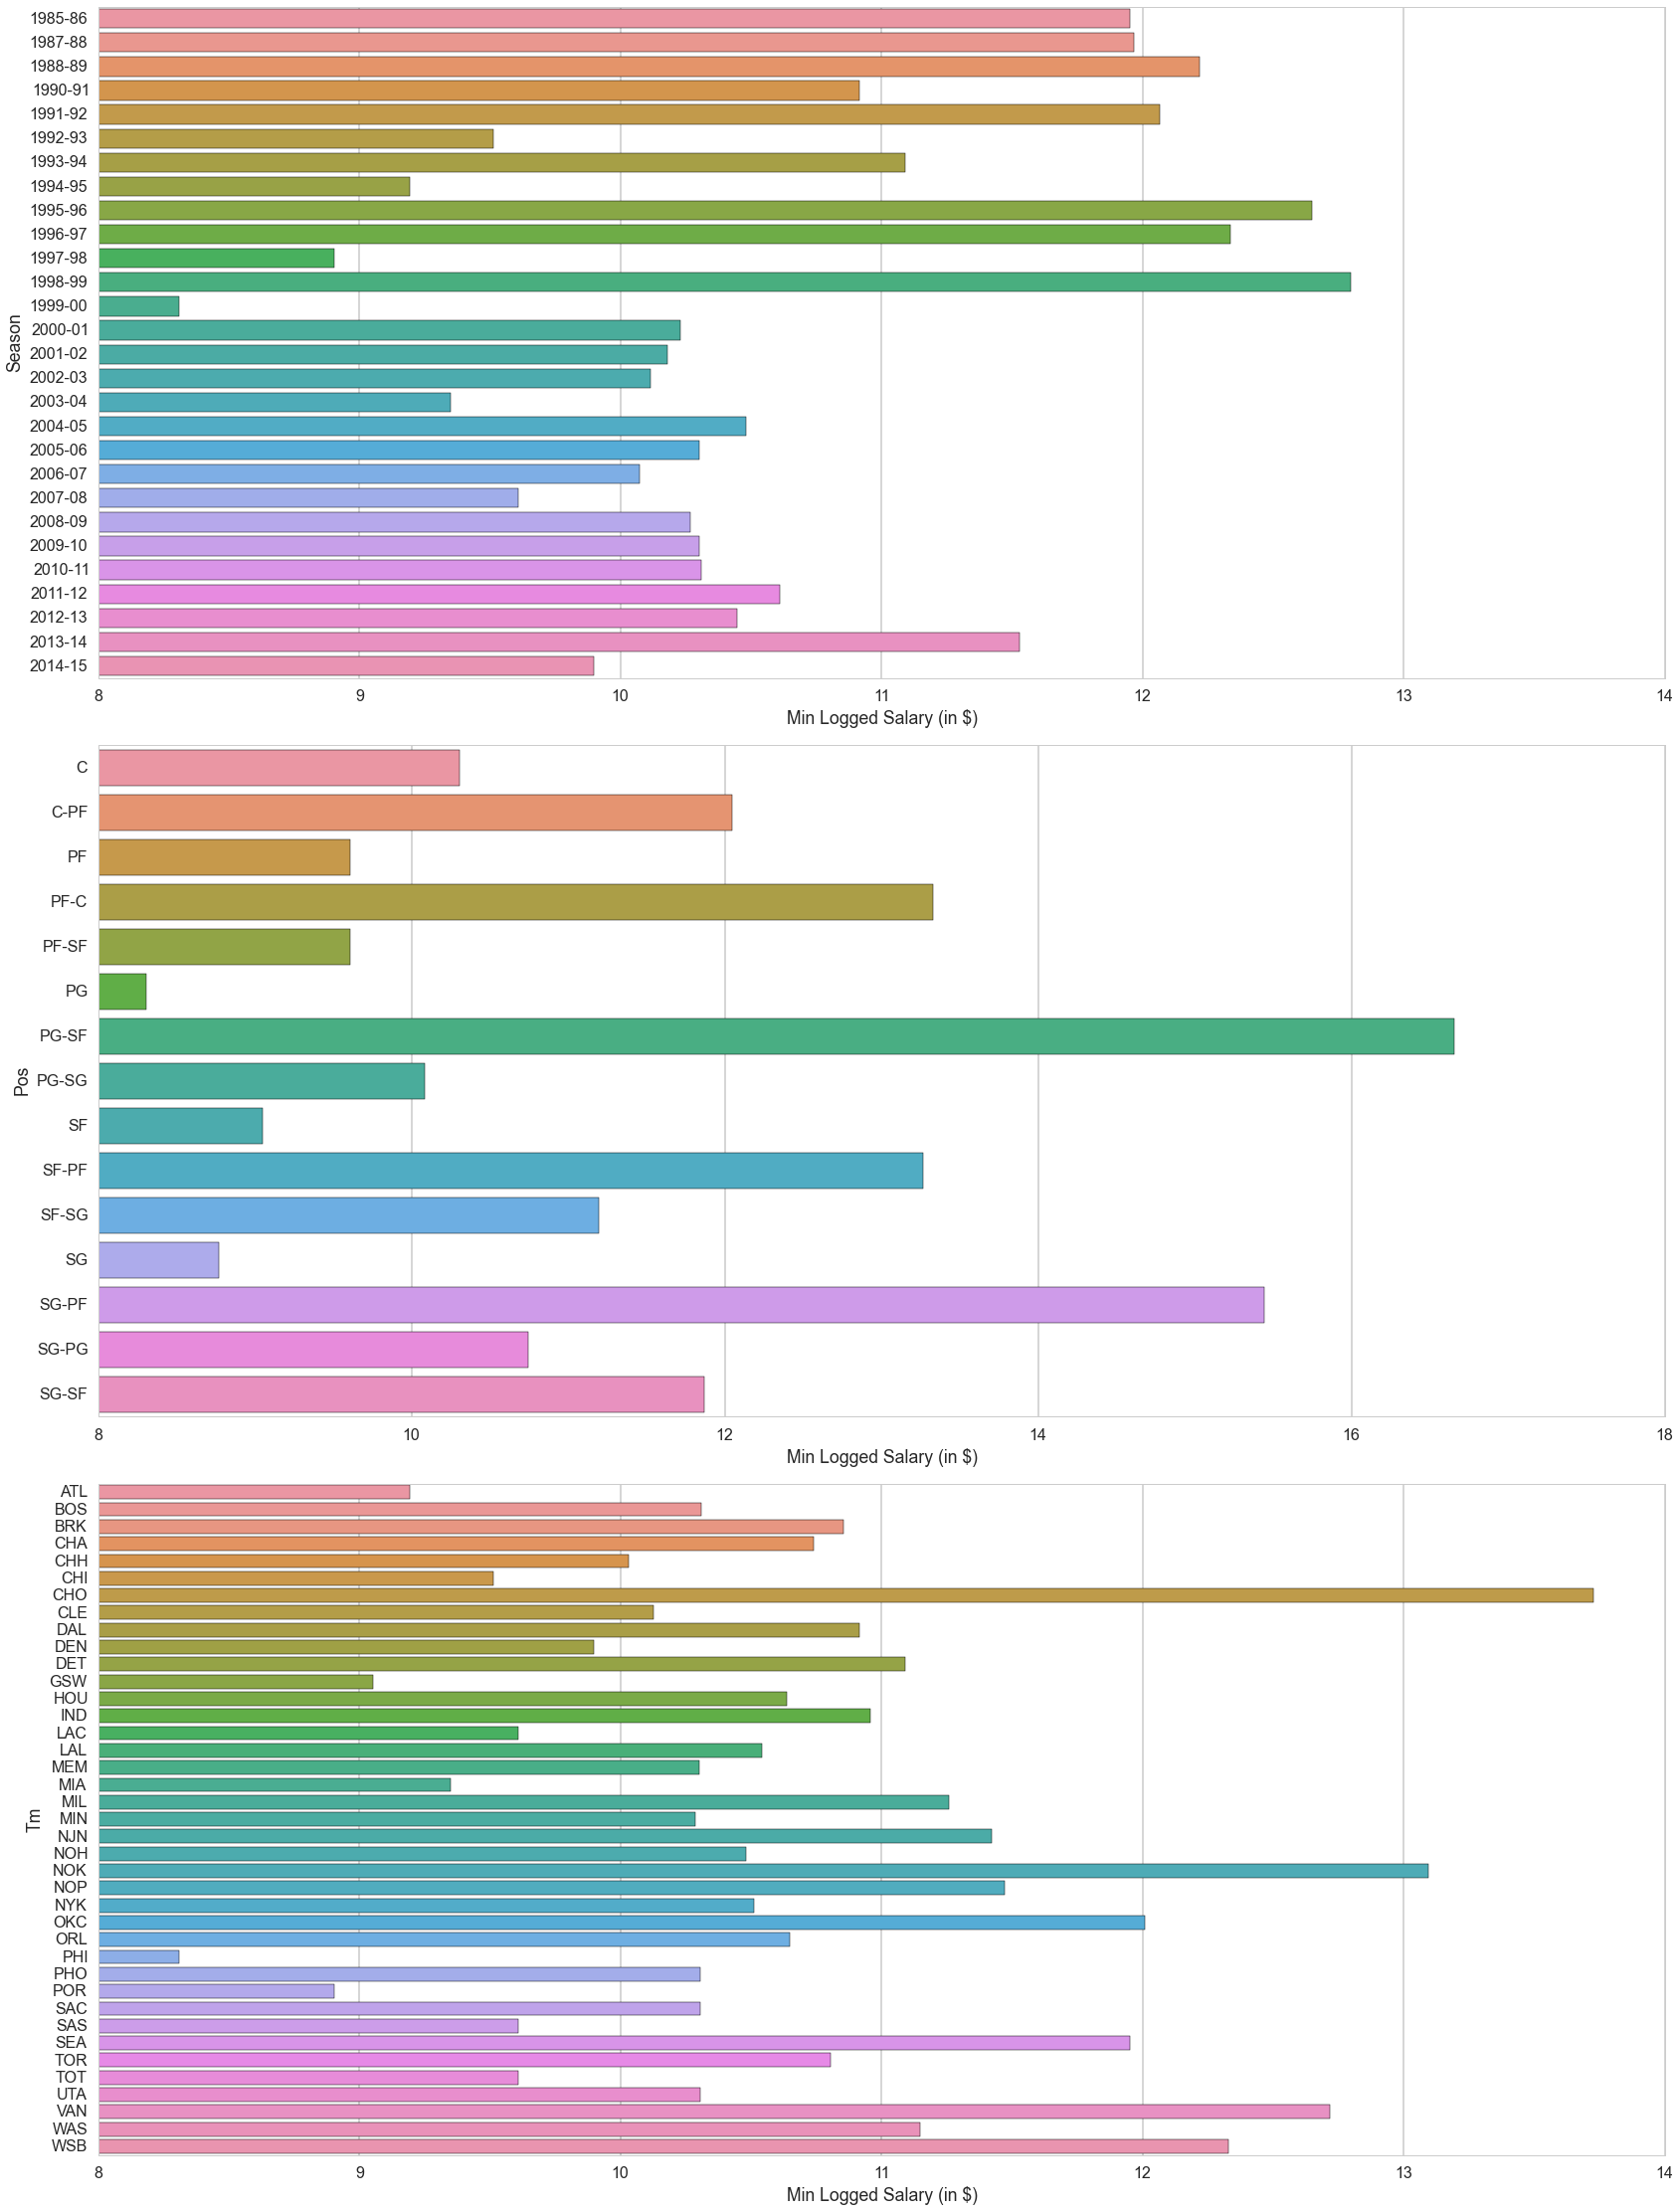

In [66]:
#initiaties i to help with subplots
i=1
#specifies size and layout of subplots
plt.subplots(nrows=3, ncols=1, figsize=(25,30))
plt.subplots_adjust(left=None, bottom=0, right=1, top=1, wspace=0.3, hspace=0.1)
#iterates through all features in ccols
for x in CATS:
    plt.subplot(3,1,i)
    i=i+1
    dfcat = df
    dfcat = dfcat.groupby(x)
    dfcat = dfcat.apply(lambda x: x[x['Salary'] == x['Salary'].min()]).reset_index(drop=True)
    sns.barplot(y=dfcat[x], x=dfcat['Salary'])
    plt.xlim(8)
    plt.xlabel("Min Logged Salary (in $)");

Now, on to regressions. We create our training, testing, and validation sets.

In [67]:
trainlist=[]
testlist=[]
validatelist=[]
take=5
for k, v in df.groupby('Player'):
    if len(v) >=5:
        takenos=np.random.choice(range(take), size=take/2, replace=False)
        takelist=np.array([e in takenos for e in range(take)])
        validatelist.append(v[-take:][~takelist])#use those 
        testlist.append(v[-take:][takelist])#use the other 
        trainlist.append(v[:-take])
    else:
        trainlist.append(v)
traindf=pd.concat(trainlist)
validatedf=pd.concat(validatelist)
testdf=pd.concat(testlist)
print traindf.shape, validatedf.shape, testdf.shape

(5755, 32) (2346, 32) (1564, 32)


Before predicting salaries, we selected a list of columns that aren't quantitative (ie: Team, League, Player, etc.) and removed them from the list of traindf columns.  Now we can try a few diffrent models to see which has the best predicting power.

In [68]:
lcols=list(traindf.columns)
remove = [u'Salary',u'Tm',u'Season',u'Pos',u'Player',u'Lg',u'3P%']
lcols = [r for r in lcols if r not in remove]

The first model we tried to use a Lasso regression and we iterated through alpha terms to find the best alpha value.

In [69]:
from sklearn import linear_model
alpha = [0.000001, 0.00001, 0.0001, 0.001, 10., 100., 10000]
minimum_lasso = 0
best_alpha_lasso = 0
for alph in alpha:
    y = traindf['Salary'].values
    X=traindf[lcols].values
    clf = linear_model.Lasso(alpha=alph)
    clf.fit(X, y)
    X_test = testdf[lcols].values
    y_test = testdf['Salary'].values
    r2 = clf.score(X_test,y_test)
    if r2 > minimum_lasso:
        minimum_lasso = r2
        best_alpha_lasso = alph
        
print minimum_lasso,best_alpha_lasso

0.117046385269 0.0001


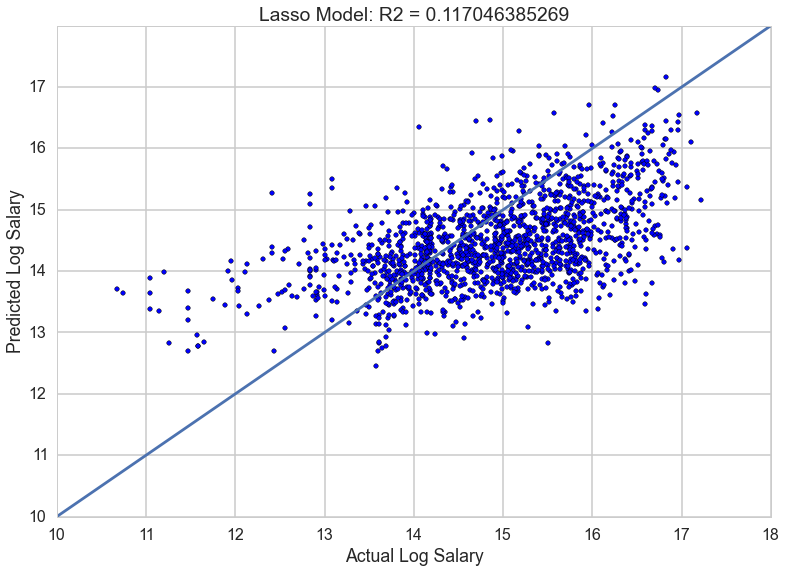

In [70]:
lasso_model = linear_model.Lasso(alpha = best_alpha_lasso)
lasso_model.fit(X,y)
y_guess_lasso = lasso_model.predict(X_test)

plt.scatter(testdf['Salary'].values,y_guess_lasso)
plt.plot([8,18],[8,18])
plt.yticks(np.arange(8, 18, 1))
plt.ylim(10,18)
plt.xlim(10,18)
plt.xlabel('Actual Log Salary')
plt.ylabel('Predicted Log Salary')
plt.title('Lasso Model: R2 = ' + str(minimum_lasso))
plt.savefig('LassoModel.png', bbox_inches='tight')

Then we tried a Ridge regression

In [71]:
alpha = [0.000001, 0.00001, 0.0001, 0.001, .1, 1., 10., 100., 10000]
maximum_ridge = 0
best_alpha_ridge = 0
for alph in alpha:
    y = traindf['Salary'].values
    X=traindf[lcols].values
    clf = linear_model.Ridge(alpha=alph)
    clf.fit(X, y)
    X_test = testdf[lcols].values
    y_test = testdf['Salary'].values
    r2 = clf.score(X_test,y_test)
    if r2 > maximum_ridge:
        maximum_ridge = r2
        best_alpha_ridge = alph
        
print maximum_ridge,best_alpha_ridge

0.116724768015 1.0


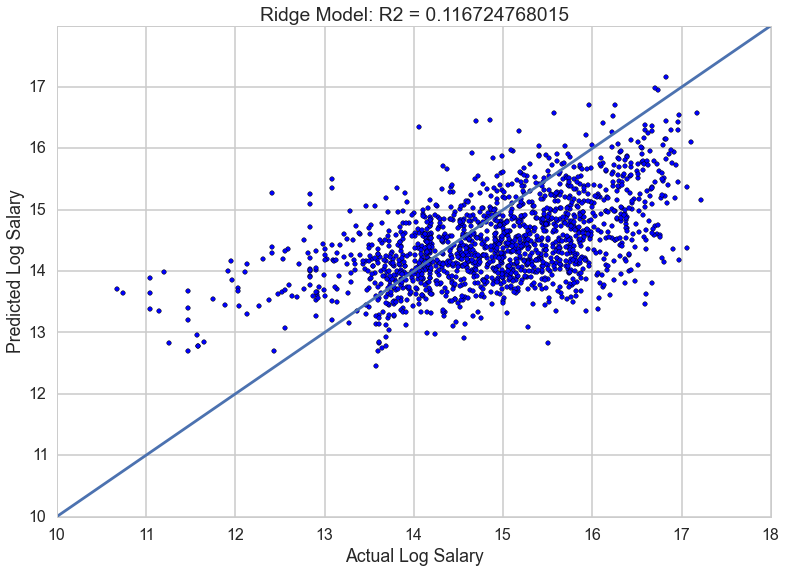

In [72]:
ridge_model = linear_model.Ridge(alpha = best_alpha_ridge)
ridge_model.fit(X,y)
y_guess_ridge = ridge_model.predict(X_test)

plt.scatter(testdf['Salary'].values,y_guess_lasso)
plt.plot([8,18],[8,18])
plt.yticks(np.arange(8, 18, 1))
plt.ylim(10,18)
plt.xlim(10,18)
plt.xlabel('Actual Log Salary')
plt.ylabel('Predicted Log Salary')
plt.title('Ridge Model: R2 = ' + str(maximum_ridge))
plt.savefig('RidgeModel.png', bbox_inches='tight')

Next, we tried an Elastic Net regression (combination of Lasso and Ridge) to see if the mixed model was better.

In [73]:
alpha = [0.000001, 0.00001, 0.0001, 0.001, 10., 100., 10000]
maximum_ENet = 0
best_alpha_ENet = 0
for alph in alpha:
    y = traindf['Salary'].values
    X=traindf[lcols].values
    clf = linear_model.ElasticNet(alpha=alph)
    clf.fit(X, y)
    X_test = testdf[lcols].values
    y_test = testdf['Salary'].values
    r2 = clf.score(X_test,y_test)
    if r2 > maximum_ENet:
        maximum_Enet = r2
        best_alpha_Enet = alph
        
print maximum_Enet,best_alpha_Enet

0.116339183264 0.001


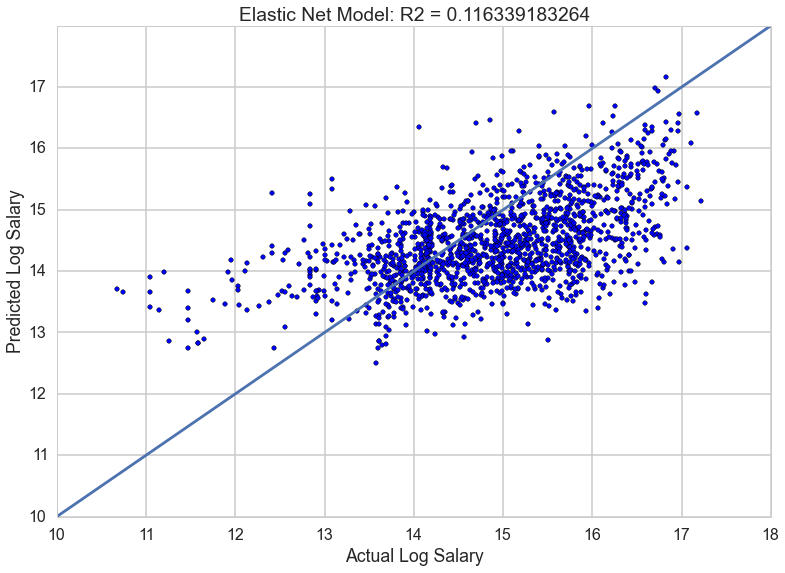

In [74]:
Enet_model = linear_model.ElasticNet(alpha = best_alpha_Enet)
Enet_model.fit(X,y)
y_guess_Enet = Enet_model.predict(X_test)

plt.scatter(testdf['Salary'].values,y_guess_Enet)
plt.plot([8,18],[8,18])
plt.yticks(np.arange(8, 18, 1))
plt.ylim(10,18)
plt.xlim(10,18)
plt.xlabel('Actual Log Salary')
plt.ylabel('Predicted Log Salary')
plt.title('Elastic Net Model: R2 = ' + str(maximum_Enet))
plt.savefig('EnetModel.png', bbox_inches='tight')

Looking at Ridge, Elastic Net, and Lasso Regression, they all yield similar results.  The R2 values are roughly the same (they hover around 0.12).  Thus, this means that we can account for about ~12% of the error with our model.  

Lastly, we decided to try a Random Forest regression to see if a new type of regression would do a better job.  We varied the number of trees and max number of features included to see which yielded the best results.

In [75]:
from sklearn import ensemble
num_trees = [2,5,10,20,40,80,160,320,640,1000]
max_features = [0.2,0.4,0.6,0.8,0.9,1]
maximum = 0
best_feature = 0
best_num_tree = 0
for tree in num_trees:
    for feature in max_features:
        y = traindf['Salary'].values
        X=traindf[lcols].values
        clf = ensemble.RandomForestRegressor(n_estimators = tree,n_jobs = -1,warm_start = True,max_features=feature)
        clf.fit(X, y)
        X_test = testdf[lcols].values
        y_test = testdf['Salary'].values
        r2 = clf.score(X_test,y_test)
        if r2 > maximum:
            best_num_tree = tree
            maximum = r2 
            best_feature = feature

In [76]:
print maximum,best_num_tree,best_feature

0.162803191799 320 0.9


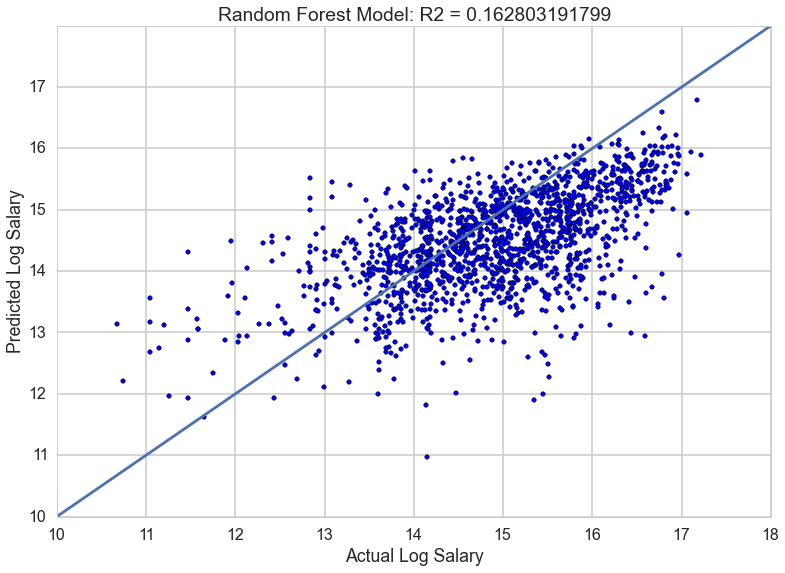

In [77]:
best_model = ensemble.RandomForestRegressor(n_estimators = best_num_tree,n_jobs = -1,warm_start = True,max_features=best_feature)
best_model.fit(X,y)
y_guess = best_model.predict(X_test)

plt.scatter(testdf['Salary'].values,y_guess)
plt.plot([8,18],[8,18])
plt.yticks(np.arange(8, 18, 1))
plt.ylim(10,18)
plt.xlim(10,18)
plt.xlabel('Actual Log Salary')
plt.ylabel('Predicted Log Salary')
plt.title('Random Forest Model: R2 = ' + str(maximum))
plt.savefig('RFBestModel.png', bbox_inches='tight')

The Random Forest model with 320 trees and 90% of the max features turned out to have the best predictive ability.  Additionally, with an R2 value that ranged between ~0.16 and 0.19, it was our best model by a substantial margin. 